In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time

In [2]:
data = pd.read_csv(r"C:\Users\akgh1\Desktop\regression\search-ahr\regression\Flight_Price_Dataset_Q2.csv")
data.tail(10)

,departure_time,stops,arrival_time,class,duration,days_left,price
270128,Evening,one,Night,Business,6.58,49,51345
270129,Morning,one,Night,Business,13.67,49,51345
270130,Evening,one,Morning,Business,16.00,49,51345
270131,Evening,one,Morning,Business,18.92,49,51345
270132,Early_Morning,one,Morning,Business,26.83,49,51345
270133,Early_Morning,one,Night,Business,17.25,49,68739
270134,Morning,one,Evening,Business,10.08,49,69265
270135,Afternoon,one,Night,Business,10.42,49,77105
270136,Early_Morning,one,Evening,Business,10.00,49,81585
270137,Morning,one,Evening,Business,10.08,49,81585


In [3]:
X = data[['duration', 'days_left']]
Y = data['price']
dummies = pd.get_dummies(data[['departure_time', 'stops', 'arrival_time', 'class']])
dummies

,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True
1,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True
2,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
3,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True
4,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270133,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
270134,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False
270135,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
270136,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False


In [4]:
X = pd.concat([X, dummies], axis=1)
X_tex = X
X

,duration,days_left,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
0,2.17,1,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True
1,2.33,1,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True
2,2.17,1,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
3,2.25,1,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True
4,2.33,1,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270133,17.25,49,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
270134,10.08,49,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False
270135,10.42,49,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
270136,10.00,49,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False


In [5]:
X = (X - X.mean())/ X.std()
X['Ones'] = 1
X = X.to_numpy()
Y = Y.to_numpy()
X[1]

array([-1.37499463, -1.84374895, -0.43480457,  1.86919727, -0.52624448,
       -0.06640552, -0.55740414, -0.43670493, -2.2556921 , -0.21471284,
        2.7056637 , -0.38119813, -0.23281105, -0.59421983, -0.22146521,
        1.94587819, -0.66257646, -0.67258366,  0.67258366,  1.        ])

In [6]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X_train)/len(X)

0.7999985192753334

In [7]:
# from sklearn.metrics import mean_squared_error
class gradient_descent:
    def __init__(self, learning_rate=0.1, num_iterations=2000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.coefficients = None
        self.coefficients = None
        self.cost_history = []
        self.tolerance = tolerance

    def fit(self, X, Y):

        self.coefficients = np.zeros(X.shape[1])

        for iteration  in range(self.num_iterations):

            predictions = np.dot(X, self.coefficients)

            errors = predictions - Y

            gradient = np.dot(X.T, errors) / len(Y)
            self.coefficients -= self.learning_rate * gradient

            rmse = np.sqrt(np.mean((predictions - Y) ** 2))
            # rmse = np.sqrt(mean_squared_error(Y, predictions))
            self.cost_history.append(rmse)


            if iteration > 0 and abs(self.cost_history[iteration - 1] - rmse) < 1e-3 and self.learning_rate > 0.01:
                self.learning_rate = self.learning_rate / 10 
                print(abs(self.cost_history[iteration - 1] -rmse))
                print('learning_rate *= 0.1 ' ,self.learning_rate )
                
            if iteration > 0 and abs(self.cost_history[iteration - 1] - rmse) < self.tolerance:
                print(abs(self.cost_history[iteration - 1] - rmse))
                self.num_iterations = iteration + 1
                print(f"Converged after {iteration} iterations.")
                break

    def predict(self, X):
        if self.coefficients is None:
            raise ValueError("Model has not been fitted. Call fit() first.")
        return np.dot(X, self.coefficients)

In [8]:
model = gradient_descent()
start_time = time.time()
model.fit(X_train, Y_train)
end_time = time.time()
print("Final Coefficients:",model.coefficients)
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

0.0009526100029688678
learning_rate *= 0.1  0.01
9.993646017392166e-07
Converged after 572 iterations.
Final Coefficients: [ 2.05208586e+02 -1.78652965e+03 -2.91901742e+02  9.98904955e+00
  4.49144417e+01  3.39737133e+01  1.25820841e+02  7.72204785e+01
  9.71421075e+02  1.04890546e+03 -1.76890714e+03 -3.34769721e+02
 -3.77004202e+02  2.86976996e+02 -1.50008504e+02 -3.35762275e+01
  2.47528063e+02  1.05202465e+04 -1.05202465e+04  2.08930545e+04]
Training Time: 7.1547322273254395 seconds


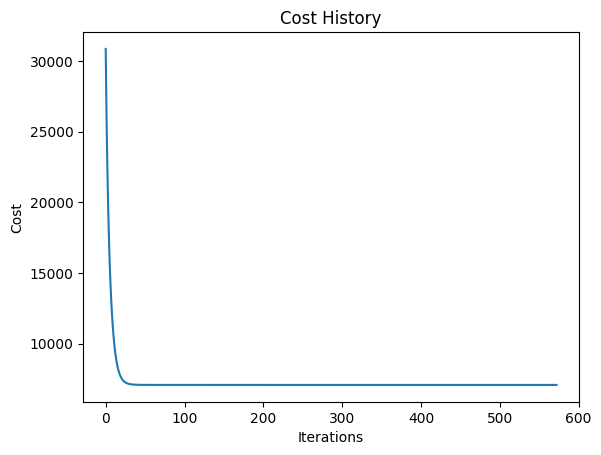

In [9]:
plt.plot(range(model.num_iterations), model.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()

Text(0, 0.5, 'Y_train')

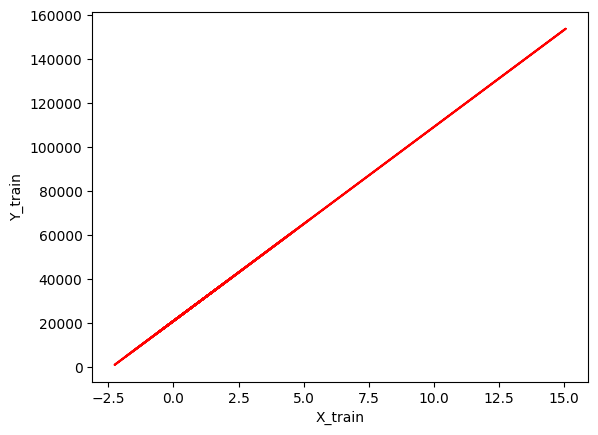

In [10]:
plt.plot(X_train, model.coefficients[0]*X_train + model.coefficients[1]*X_train +model.coefficients[2]*X_train +model.coefficients[3]*X_train +model.coefficients[4]*X_train +model.coefficients[5]*X_train +model.coefficients[6]*X_train +model.coefficients[7]*X_train + model.coefficients[8]*X_train +model.coefficients[9]*X_train +model.coefficients[10]*X_train +model.coefficients[11]*X_train +model.coefficients[12]*X_train +model.coefficients[13]*X_train +model.coefficients[14]*X_train +model.coefficients[15]*X_train +model.coefficients[16]*X_train +model.coefficients[17]*X_train + model.coefficients[-1], '-r')
plt.xlabel("X_train")
plt.ylabel("Y_train")

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
test_y_ = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, test_y_))
mae_test = mean_absolute_error(Y_test , test_y_)
mse_test = mean_squared_error(Y_test, test_y_)
r2_test = r2_score(Y_test, test_y_)
output = "PRICE = "
for col, coef in zip(X_tex.columns, model.coefficients):
    output+=''.join([f"({coef:.2f} * [{col}]) + "])

output += f"({model.coefficients[-1]}) \n"
output += f"Training Time: {end_time - start_time:.3f}s\n\n"
output += "Logs:\n"
output += f"MSE: {mse_test}\n"
output += f"RMSE: {rmse_test}\n"
output += f"MAE: {mae_test}\n"
output += f"R2: {r2_test}\n"
print(output)


with open('[10]-UIAI4021-PR1-Q2.txt', 'w') as file:
    file.write(output)

PRICE = (205.21 * [duration]) + (-1786.53 * [days_left]) + (-291.90 * [departure_time_Afternoon]) + (9.99 * [departure_time_Early_Morning]) + (44.91 * [departure_time_Evening]) + (33.97 * [departure_time_Late_Night]) + (125.82 * [departure_time_Morning]) + (77.22 * [departure_time_Night]) + (971.42 * [stops_one]) + (1048.91 * [stops_two_or_more]) + (-1768.91 * [stops_zero]) + (-334.77 * [arrival_time_Afternoon]) + (-377.00 * [arrival_time_Early_Morning]) + (286.98 * [arrival_time_Evening]) + (-150.01 * [arrival_time_Late_Night]) + (-33.58 * [arrival_time_Morning]) + (247.53 * [arrival_time_Night]) + (10520.25 * [class_Business]) + (-10520.25 * [class_Economy]) + (20893.054517207303) 
Training Time: 7.155s

Logs:
MSE: 49691276.72451339
RMSE: 7049.203978075354
MAE: 4654.571519279775
R2: 0.9037245576230007

